# Ragged Tensors

In [1]:
import math
import tensorflow as tf

Most libraries (e.g. math) at the core of it there is Python, Numpy, matplotlib etc.

- Ragged tensors will be used in text analytics and other than that ragged tensor will be used in images. In case of images, ragged tensor will show a deformed image in which all the information is not available. In restoration of image.
- We provide images to model that r correct, ragged tensor will be special case anyway. We will have to deal with it seperately.

## Overview

*Ragged tensors* are the TensorFlow equivalent of nested variable-length lists. Ragged tensors help in storing and processing data with non-uniform shapes, including:

- Variable-length features, such as the set of actors in a movie.
- Batches of variable-length sequential inputs, such as sentences or video clips.
- Hierarchical inputs, such as text documents that are subdivided into sections, paragraphs, sentences, and words.
- Individual fields in structured inputs, such as protocol buffers.


### Operations in ragged tensor

Ragged tensors are supported by more than a hundred TensorFlow operations, including:
* math operations (such as `tf.add` and `tf.reduce_mean`), 
* array operations (such as `tf.concat` and `tf.tile`), 
* string manipulation ops (such as `tf.strings.substr`), 
* control flow operations (such as `tf.while_loop` and `tf.map_fn`), 
* many others:

In [123]:
digits = tf.ragged.constant([[3, 1, 4, 1], [], [5, 9, 2], [6], []])
print(digits)
words = tf.ragged.constant([["So", "long"], ["thanks", "for", "all", "the", "food"]])
print(words)

<tf.RaggedTensor [[3, 1, 4, 1], [], [5, 9, 2], [6], []]>
<tf.RaggedTensor [[b'So', b'long'], [b'thanks', b'for', b'all', b'the', b'food']]>


### The b prefix indicates that it is a byte string and not unicode string. You can use tf.print() to print it properly.

In [3]:
tf.print(words)

[['So', 'long'], ['thanks', 'for', 'all', 'the', 'food']]


In [4]:
print(digits.shape)
print(words.shape)

(5, None)
(2, None)


In [5]:
print(tf.add(digits, 3))

<tf.RaggedTensor [[6, 4, 7, 4], [], [8, 12, 5], [9], []]>


### Movement axis=0 & axis=1

## <font color=blue>axis=0 means movement is row-wise (i.e. 1 column elements will be added) while axis=1 means movement is column wise (so elements in 1 row will be added).

In [6]:
print(tf.reduce_mean(digits, axis=0))   # movement along rows, so add column wise

tf.Tensor([4.66666667 5.         3.         1.        ], shape=(4,), dtype=float64)


In [7]:
print(tf.reduce_mean(digits, axis=1))  # movement along col's, so add rows wise

tf.Tensor([2.25              nan 5.33333333 6.                nan], shape=(5,), dtype=float64)


In [8]:
print(tf.concat([digits, [[5, 3]]], axis=0)) # axis=0 means another sample added 

# concat here means will add list to given list

<tf.RaggedTensor [[3, 1, 4, 1], [], [5, 9, 2], [6], [], [5, 3]]>


In [9]:
print(digits)

<tf.RaggedTensor [[3, 1, 4, 1], [], [5, 9, 2], [6], []]>


In [10]:
digits.shape

TensorShape([5, None])

In [11]:
tile1 = (tf.tile(digits, [1, 2]))
print(tile1)
print(tile1.shape)


<tf.RaggedTensor [[3, 1, 4, 1, 3, 1, 4, 1], [], [5, 9, 2, 5, 9, 2], [6, 6], []]>
(5, None)


In [12]:
tile2 = (tf.tile(digits, [2, 2]))
print(tile2)
print(tile2.shape)


<tf.RaggedTensor [[3, 1, 4, 1, 3, 1, 4, 1], [], [5, 9, 2, 5, 9, 2], [6, 6], [],
 [3, 1, 4, 1, 3, 1, 4, 1], [], [5, 9, 2, 5, 9, 2], [6, 6], []]>
(10, None)


In [13]:
print(words)

<tf.RaggedTensor [[b'So', b'long'], [b'thanks', b'for', b'all', b'the', b'food']]>


In [14]:
print(tf.strings.substr(words, 0, 2))      # start from 0 index take 2 

<tf.RaggedTensor [[b'So', b'lo'], [b'th', b'fo', b'al', b'th', b'fo']]>


In [15]:
print(tf.strings.substr(words, 1, 2))      # start from 1 index take 2

<tf.RaggedTensor [[b'o', b'on'], [b'ha', b'or', b'll', b'he', b'oo']]>


In [16]:
print(tf.map_fn(tf.math.square, digits)) 

# In tensorflow function name is map_fn, in python we had the map function.

<tf.RaggedTensor [[9, 1, 16, 1], [], [25, 81, 4], [36], []]>


#### There are also a number of methods and operations that are specific to ragged tensors, including factory methods, conversion methods, and value-mapping operations. For a list of supported ops, see the **`tf.ragged` package documentation**.

#### Ragged tensors are supported by many TensorFlow APIs, including [Keras](https://www.tensorflow.org/guide/keras), [Datasets](https://www.tensorflow.org/guide/data), [tf.function](https://www.tensorflow.org/guide/function), [SavedModels](https://www.tensorflow.org/guide/saved_model), and [tf.Example](https://www.tensorflow.org/tutorials/load_data/tfrecord).  For more information, check the section on **TensorFlow APIs** below.

As with normal tensors, you can use Python-style indexing to access specific slices of a ragged tensor. For more information, refer to the section on **Indexing** below.

In [17]:
print(digits)

<tf.RaggedTensor [[3, 1, 4, 1], [], [5, 9, 2], [6], []]>


In [18]:
print(digits[0])   # First row (only extracting part of ragged tensor, we get tensor as o/p)


tf.Tensor([3 1 4 1], shape=(4,), dtype=int32)


In [19]:
print(digits[:, :2])   # First two values in each row.

<tf.RaggedTensor [[3, 1], [], [5, 9], [6], []]>


In [20]:
print(digits[:, -2:])  # Last two values in each row.

<tf.RaggedTensor [[4, 1], [], [9, 2], [6], []]>


Only the step size, whether +ve or -ve, decides whether movement will be left to right or right to left. Above all cases step size by default +ve so we move from left to right.

#### just like normal tensors, one can use Python arithmetic and comparison operators to perform elementwise operations. For more information, check the section on **Overloaded operators** below.

In [21]:
print(digits)

<tf.RaggedTensor [[3, 1, 4, 1], [], [5, 9, 2], [6], []]>


In [22]:
print(digits + 3)

<tf.RaggedTensor [[6, 4, 7, 4], [], [8, 12, 5], [9], []]>


In [23]:
print(digits + tf.ragged.constant([[1, 2, 3, 4], [], [5, 6, 7], [8], []]))

<tf.RaggedTensor [[4, 3, 7, 5], [], [10, 15, 9], [14], []]>


**Since columns are not fixed in case of ragged tensors hence difficult for compatibility when doing math operation. Above e.g. both tensor rows having same col's hence addition possible.**

If you need to perform an elementwise transformation to the values of a `RaggedTensor`, you can use `tf.ragged.map_flat_values`, which takes a function plus one or more arguments, and applies the function to transform the `RaggedTensor`'s values.

In [24]:
digits

<tf.RaggedTensor [[3, 1, 4, 1], [], [5, 9, 2], [6], []]>

In [25]:
times_two_plus_one = lambda x: x * 2 + 1  

# lambda works better in conjugation with other functions like map, filter etc

print(tf.ragged.map_flat_values(times_two_plus_one, digits))

<tf.RaggedTensor [[7, 3, 9, 3], [], [11, 19, 5], [13], []]>


### Typeconversion Examples

We can convert one data structure to another.

Ragged tensors can be converted to nested Python `list`s and NumPy `array`s:

Typeconversion into list or array will help to use all properties of list or array. Help to take advantage of other data type by typeconversion.

- Lists, Tuples, Sets, Dictionary data structures.
- Matrix also a type of data structure, a structure in which u r storing data.
- Tensors also a type of data structure.

In [26]:
digits.to_list()

[[3, 1, 4, 1], [], [5, 9, 2], [6], []]

In [27]:
digits.numpy()

array([array([3, 1, 4, 1], dtype=int32), array([], dtype=int32),
       array([5, 9, 2], dtype=int32), array([6], dtype=int32),
       array([], dtype=int32)], dtype=object)

### Constructing a ragged tensor

The simplest way to construct a ragged tensor is using `tf.ragged.constant`, which builds the `RaggedTensor` corresponding to a given nested Python `list` or NumPy `array`:

In [28]:
sentences = tf.ragged.constant([
    ["Let's", "build", "some", "ragged", "tensors", "!"],
    ["We", "can", "use", "tf.ragged.constant", "."]])
print(sentences)

<tf.RaggedTensor [[b"Let's", b'build', b'some', b'ragged', b'tensors', b'!'],
 [b'We', b'can', b'use', b'tf.ragged.constant', b'.']]>


In [29]:
paragraphs = tf.ragged.constant([
    [['I', 'have', 'a', 'cat'], ['His', 'name', 'is', 'Mat']],
    [['Do', 'you', 'want', 'to', 'come', 'visit'], ["I'm", 'free', 'tomorrow']],
])
print(paragraphs)

<tf.RaggedTensor [[[b'I', b'have', b'a', b'cat'], [b'His', b'name', b'is', b'Mat']],
 [[b'Do', b'you', b'want', b'to', b'come', b'visit'],
  [b"I'm", b'free', b'tomorrow']]]>


Ragged tensors can also be constructed by pairing flat *values* tensors with *row-partitioning* tensors indicating how those values should be divided into rows, using factory classmethods such as `tf.RaggedTensor.from_value_rowids`, `tf.RaggedTensor.from_row_lengths`, and `tf.RaggedTensor.from_row_splits`.

#### `tf.RaggedTensor.from_value_rowids`

If you know which row each value belongs to, then you can build a `RaggedTensor` using a `value_rowids` row-partitioning tensor:

![value_rowids row-partitioning tensor](https://www.tensorflow.org/images/ragged_tensors/value_rowids.png)

Ragged tensors can be constructed by pairing the flat value tensors. 

In [30]:
print(tf.RaggedTensor.from_value_rowids(
    values=[3, 1, 4, 1, 5, 9, 2],
    value_rowids=[0, 0, 0, 0, 2, 2, 3]))

<tf.RaggedTensor [[3, 1, 4, 1], [], [5, 9], [2]]>


The values and id should be of same length as above, 7 elements in each so mapping is possible.

#### `tf.RaggedTensor.from_row_lengths`

If you know how long each row is, then you can use a `row_lengths` row-partitioning tensor:

![row_lengths row-partitioning tensor](https://www.tensorflow.org/images/ragged_tensors/row_lengths.png)

In [31]:
print(tf.RaggedTensor.from_row_lengths(
    values=[3, 1, 4, 1, 5, 9, 2],
    row_lengths=[4, 0, 2, 1]))

<tf.RaggedTensor [[3, 1, 4, 1], [], [5, 9], [2]]>


#### `tf.RaggedTensor.from_row_splits`

If you know the index where each row starts and ends, then you can use a `row_splits` row-partitioning tensor:

![row_splits row-partitioning tensor](https://www.tensorflow.org/images/ragged_tensors/row_splits.png)

In [32]:
print(tf.RaggedTensor.from_row_splits(
    values=[3, 1, 4, 1, 5, 9, 2],
    row_splits=[0, 4, 4, 6, 7]))

<tf.RaggedTensor [[3, 1, 4, 1], [], [5, 9], [2]]>


See the `tf.RaggedTensor` class documentation for a full list of factory methods.

Note: By default, these factory methods add assertions that the row partition tensor is well-formed and consistent with the number of values.  The `validate=False` parameter can be used to skip these checks if you can guarantee that the inputs are well-formed and consistent.

### What can be stored in a ragged tensor

### Tensors like numpy array will be homogenous in nature

As with normal `Tensor`s, the values in a `RaggedTensor` must all have the same
type; and the values must all be at the same nesting depth (the *rank* of the
tensor):

In [33]:
t1 = (tf.ragged.constant([["Hi"], ["How", "are", "you"]]))  # ok: type=string, rank=2
print(t1)
print(t1.shape)

<tf.RaggedTensor [[b'Hi'], [b'How', b'are', b'you']]>
(2, None)


In [34]:
t2 = (tf.ragged.constant([[[1, 2], [3]], [[4, 5]]]))        # ok: type=int32, rank=3
print(t2)
print(t2.shape)


<tf.RaggedTensor [[[1, 2], [3]], [[4, 5]]]>
(2, None, None)


In [35]:
rg = tf.ragged.constant([[[1, 2], [3]], [[4, 5]]])
rg.shape

TensorShape([2, None, None])

Like we have a broken matrix, this will be like a broken cube.

In [36]:
try:
    tf.ragged.constant([["one", "two"], [3, 4]])              # wrong: multiple types
except ValueError as exception:
    print(exception)

Can't convert Python sequence with mixed types to Tensor.


In [37]:
try:
  tf.ragged.constant(["A", ["B", "C"]])                     # wrong: multiple nesting depths
except ValueError as exception:
  print(exception)

all scalar values must have the same nesting depth


In [38]:
tf.ragged.constant([["Hi"], ["How", "are", "you"]]).shape

TensorShape([2, None])

The method `tf.RaggedTensor.bounding_shape` can be used to find a tight
bounding shape for a given `RaggedTensor`:

In [39]:
print(tf.ragged.constant([["Hi"], ["How", "are", "you"]]).bounding_shape())

tf.Tensor([2 3], shape=(2,), dtype=int64)


## Ragged vs sparse

- In **Ragged tensor** data provided is correct but length of each row is different i.e. the rows are not uniform, each row might have different number of features. Some rows might also be missing but we cannot put 0 into it.
- In **Sparse tensor** it will be a proper matrix but most of the values in it will be 0.
- Concatenation means joining of 2 tensors.

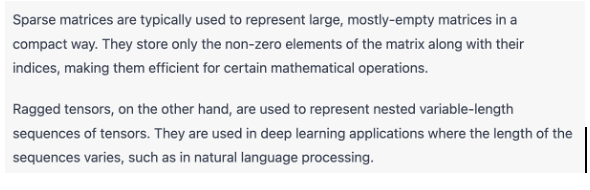

If we need to convert a ragged tensor to a proper matrix, we need to add some entries to it. So for this we can convert it into a sparse matrix as shown below.


A ragged tensor should *not* be thought of as a type of sparse tensor. In particular, **sparse tensors are *efficient encodings*** for `tf.Tensor`* **that model the same data in a compact format**; but ragged tensor is an *extension to `tf.Tensor`* that models an expanded class of data. This difference is crucial when defining operations:

- Applying an op to a sparse or dense tensor should always give the same result.
- Applying an op to a ragged or sparse tensor may give different results.

As an illustrative example, consider how array operations such as `concat`, `stack`, and `tile` are defined for ragged vs. sparse tensors. Concatenating ragged tensors joins each row to form a single row with the combined length:

## Ragged concatenation

![Concatenating ragged tensors](https://www.tensorflow.org/images/ragged_tensors/ragged_concat.png)


In [40]:
ragged_x = tf.ragged.constant([["John"], ["a", "big", "dog"], ["my", "cat"]])
ragged_y = tf.ragged.constant([["fell", "asleep"], ["barked"], ["is", "fuzzy"]])
print(tf.concat([ragged_x, ragged_y], axis=1))

<tf.RaggedTensor [[b'John', b'fell', b'asleep'], [b'a', b'big', b'dog', b'barked'],
 [b'my', b'cat', b'is', b'fuzzy']]>


However, concatenating sparse tensors is equivalent to concatenating the corresponding dense tensors, as illustrated by the following example (where Ø indicates missing values):

## Sparse concatenation


![Concatenating sparse tensors](https://www.tensorflow.org/images/ragged_tensors/sparse_concat.png)


In [41]:
sparse_x = ragged_x.to_sparse()
sparse_y = ragged_y.to_sparse()
sparse_result = tf.sparse.concat(sp_inputs=[sparse_x, sparse_y], axis=1)
print(tf.sparse.to_dense(sparse_result, ''))

tf.Tensor(
[[b'John' b'' b'' b'fell' b'asleep']
 [b'a' b'big' b'dog' b'barked' b'']
 [b'my' b'cat' b'' b'is' b'fuzzy']], shape=(3, 5), dtype=string)


For another example of why this distinction is important, consider the
definition of “the mean value of each row” for an op such as `tf.reduce_mean`.
For a ragged tensor, the mean value for a row is the sum of the
row’s values divided by the row’s width.
But for a sparse tensor, the mean value for a row is the sum of the
row’s values divided by the sparse tensor’s overall width (which is
greater than or equal to the width of the longest row).


## Overloaded operators

The `RaggedTensor` class overloads the standard Python arithmetic and comparison operators, making it easy to perform basic elementwise math:

Direct addition of ragged tensors is possible if length is same as below.

In [42]:
x = tf.ragged.constant([[1, 2], [3], [4, 5, 6]])
y = tf.ragged.constant([[1, 1], [2], [3, 3, 3]])
print(x + y)

# In case of list we cannot do + operator as it will join lists. But if array, + will do
# addition.

<tf.RaggedTensor [[2, 3], [5], [7, 8, 9]]>


Since the overloaded operators perform elementwise computations, the inputs to all binary operations must have the same shape or be broadcastable to the same shape. In the simplest broadcasting case, a single scalar is combined elementwise with each value in a ragged tensor:

In [43]:
x = tf.ragged.constant([[1, 2], [3], [4, 5, 6]])
print(x + 3)         # Broadcasting in tensors and numpy

<tf.RaggedTensor [[4, 5], [6], [7, 8, 9]]>


For a discussion of more advanced cases, check the section on **Broadcasting**.

Ragged tensors overload the same set of operators as normal `Tensor`s: the unary operators `-`, `~`, and `abs()`; and the binary operators `+`, `-`, `*`, `/`, `//`, `%`, `**`, `&`, `|`, `^`, `==`, `<`, `<=`, `>`, and `>=`.


## Indexing

Ragged tensors support Python-style indexing, including multidimensional indexing and slicing. The following examples demonstrate ragged tensor indexing with a 2D and a 3D ragged tensor.

### Indexing examples: 2D ragged tensor

In [44]:
queries = tf.ragged.constant(
    [['Who', 'is', 'George', 'Washington'],
     ['What', 'is', 'the', 'weather', 'tomorrow'],
     ['Goodnight']])

In [45]:
print(queries[1])                   # A single query

tf.Tensor([b'What' b'is' b'the' b'weather' b'tomorrow'], shape=(5,), dtype=string)


In [46]:
print(queries[1, 2])                # A single word

tf.Tensor(b'the', shape=(), dtype=string)


In [47]:
print(queries[1:])                  # Everything but the first row

<tf.RaggedTensor [[b'What', b'is', b'the', b'weather', b'tomorrow'], [b'Goodnight']]>


In [48]:
print(queries[:, :3])               # The first 3 words of each query

<tf.RaggedTensor [[b'Who', b'is', b'George'], [b'What', b'is', b'the'], [b'Goodnight']]>


In [49]:
print(queries[:, -2:])              # The last 2 words of each query

<tf.RaggedTensor [[b'George', b'Washington'], [b'weather', b'tomorrow'], [b'Goodnight']]>


### Indexing examples: 3D ragged tensor

In [50]:
rt = tf.ragged.constant([[[1, 2, 3], [4]],
                         [[5], [], [6]],
                         [[7]],
                         [[8, 9], [10]]])

## [plane , rows , columns ] - format to intrepret 3D

In [51]:
rt.shape   # 4, None , None

TensorShape([4, None, None])

In [52]:
print(rt[1])                        # Second row (2D RaggedTensor)

<tf.RaggedTensor [[5], [], [6]]>


In [53]:
print(rt[3, 0])                     # First element of fourth row (1D Tensor)

tf.Tensor([8 9], shape=(2,), dtype=int32)


In [54]:
print(rt[3, 0, 0])                     # First element of fourth row (1D Tensor)

tf.Tensor(8, shape=(), dtype=int32)


In [55]:
print(rt[:, 1:3])                   # Items 1-3 of each row (3D RaggedTensor)

<tf.RaggedTensor [[[4]], [[], [6]], [], [[10]]]>


In [56]:
print(rt[:, -1:])                   # Last item of each row (3D RaggedTensor)

<tf.RaggedTensor [[[4]],

 [[6]],

 [[7]],

 [[10]]]>


`RaggedTensor`s support multidimensional indexing and slicing with one restriction: indexing into a ragged dimension is not allowed. This case is problematic because the indicated value may exist in some rows but not others. In such cases, it's not obvious whether you should (1) raise an `IndexError`; (2) use a default value; or (3) skip that value and return a tensor with fewer rows than you started with. Following the [guiding principles of Python](https://www.python.org/dev/peps/pep-0020/) ("In the face of ambiguity, refuse the temptation to guess"), this operation is currently disallowed.

## Tensor type conversion

The `RaggedTensor` class defines methods that can be used to convert
between `RaggedTensor`s and `tf.Tensor`s or `tf.SparseTensors`:

We do typeconversion if we want to perform some mathematical operation which cannot be done by usual ragged tensors. 

In [57]:
ragged_sentences = tf.ragged.constant([
    ['Hi'], ['Welcome', 'to', 'the', 'fair'], ['Have', 'fun']])

In [58]:
# RaggedTensor -> Tensor
print(ragged_sentences.to_tensor(default_value='', shape=[None, 10]))

tf.Tensor(
[[b'Hi' b'' b'' b'' b'' b'' b'' b'' b'' b'']
 [b'Welcome' b'to' b'the' b'fair' b'' b'' b'' b'' b'' b'']
 [b'Have' b'fun' b'' b'' b'' b'' b'' b'' b'' b'']], shape=(3, 10), dtype=string)


In [59]:
# Tensor -> RaggedTensor
x = [[1, 3, -1, -1], [2, -1, -1, -1], [4, 5, 8, 9]]
print(tf.RaggedTensor.from_tensor(x, padding=-1))  

# padding=-1 means we r removing -1 from here

<tf.RaggedTensor [[1, 3], [2], [4, 5, 8, 9]]>


In [60]:
#RaggedTensor -> SparseTensor
print(ragged_sentences.to_sparse())   # for sparse we store index and values only
                                      # better memory management

SparseTensor(indices=tf.Tensor(
[[0 0]
 [1 0]
 [1 1]
 [1 2]
 [1 3]
 [2 0]
 [2 1]], shape=(7, 2), dtype=int64), values=tf.Tensor([b'Hi' b'Welcome' b'to' b'the' b'fair' b'Have' b'fun'], shape=(7,), dtype=string), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


When change from sparse to ragged, define indices where we want to store values.

In [61]:
# SparseTensor -> RaggedTensor      

st = tf.SparseTensor(indices=[[0, 0], [2, 0], [2, 1]],
                     values=['a', 'b', 'c'],
                     dense_shape=[3, 3])
print(tf.RaggedTensor.from_sparse(st))

<tf.RaggedTensor [[b'a'], [], [b'b', b'c']]>


Ragged tensors are memory effcient (in terms of how data is stored) but all types of mathematical calculations cannot be done on ragged tensors.

## Evaluating ragged tensors

To access the values in a ragged tensor, you can:

1.  Use `tf.RaggedTensor.to_list` to convert the ragged tensor to a nested Python list.
2.  Use `tf.RaggedTensor.numpy` to convert the ragged tensor to a NumPy array whose values are nested NumPy arrays.
3.  Decompose the ragged tensor into its components, using the `tf.RaggedTensor.values` and `tf.RaggedTensor.row_splits` properties, or row-partitioning methods such as `tf.RaggedTensor.row_lengths` and `tf.RaggedTensor.value_rowids`.
4.  Use Python indexing to select values from the ragged tensor.


In [62]:
rt = tf.ragged.constant([[1, 2], [3, 4, 5], [6], [], [7]])
rt

<tf.RaggedTensor [[1, 2], [3, 4, 5], [6], [], [7]]>

In [63]:
print("Python list:", rt.to_list())


Python list: [[1, 2], [3, 4, 5], [6], [], [7]]


In [64]:
print("NumPy array:", rt.numpy())


NumPy array: [array([1, 2], dtype=int32) array([3, 4, 5], dtype=int32)
 array([6], dtype=int32) array([], dtype=int32) array([7], dtype=int32)]


In [65]:
print("Values:", rt.values.numpy())         # like flattening 


Values: [1 2 3 4 5 6 7]


In [66]:
print("Splits:", rt.row_splits.numpy())


Splits: [0 2 5 6 6 7]


In [67]:
print("Indexed value:", rt[1].numpy())

Indexed value: [3 4 5]


## Ragged Shapes

The shape of a tensor specifies the size of each axis.  For example, the shape of `[[1, 2], [3, 4], [5, 6]]` is `[3, 2]`, since there are 3 rows and 2 columns.  TensorFlow has two separate but related ways to describe shapes:

* ***static shape***: Information about axis sizes that is known statically (e.g., while tracing a `tf.function`).  May be partially specified.

* ***dynamic shape***: Runtime information about the axis sizes.

### Static shape

A Tensor's static shape contains information about its axis sizes that is known at graph-construction time.  For both `tf.Tensor` and `tf.RaggedTensor`, it is available using the `.shape` property, and is encoded using `tf.TensorShape`:

In [68]:
x = tf.constant([[1, 2], [3, 4], [5, 6]])
x.shape  # shape of a tf.tensor

TensorShape([3, 2])

In [69]:
rt = tf.ragged.constant([[1], [2, 3], [], [4]])
rt.shape  # shape of a tf.RaggedTensor

TensorShape([4, None])

The static shape of a ragged dimension is always `None` (i.e., unspecified).  However, the inverse is not true -- if a `TensorShape` dimension is `None`, then that could indicate that the dimension is ragged, *or* it could indicate that the dimension is uniform but that its size is not statically known.

### Dynamic shape

A tensor's dynamic shape contains information about its axis sizes that is known when the graph is run.  It is constructed using the `tf.shape` operation.  For `tf.Tensor`, `tf.shape` returns the shape as a 1D integer `Tensor`, where `tf.shape(x)[i]` is the size of axis `i`.

In [70]:
x = tf.constant([['a', 'b'], ['c', 'd'], ['e', 'f']])
tf.shape(x)

# tf.shape will return 1,2,3 whether it is 1D, 2D, 3D tensor 

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 2], dtype=int32)>

However, a 1D `Tensor` is not expressive enough to describe the shape of a `tf.RaggedTensor`.  Instead, the dynamic shape for ragged tensors is encoded using a dedicated type, `tf.experimental.DynamicRaggedShape`.  In the following example, the `DynamicRaggedShape` returned by `tf.shape(rt)` indicates that the ragged tensor has 4 rows, with lengths 1, 3, 0, and 2:

In [71]:
rt = tf.ragged.constant([[1], [2, 3, 4], [], [5, 6]])
rt_shape = tf.shape(rt)
print(rt_shape)

<DynamicRaggedShape lengths=[4, (1, 3, 0, 2)] num_row_partitions=1>


#### Dynamic shape: operations

`DynamicRaggedShape`s can be used with most TensorFlow ops that expect shapes, including `tf.reshape`, `tf.zeros`, `tf.ones`. `tf.fill`, `tf.broadcast_dynamic_shape`, and `tf.broadcast_to`.

In [72]:
x

<tf.Tensor: shape=(3, 2), dtype=string, numpy=
array([[b'a', b'b'],
       [b'c', b'd'],
       [b'e', b'f']], dtype=object)>

In [73]:
tf.print(f"tf.reshape(x, rt_shape) = {tf.reshape(x, rt_shape)}")


tf.reshape(x, rt_shape) = <tf.RaggedTensor [[b'a'], [b'b', b'c', b'd'], [], [b'e', b'f']]>


In [74]:
tf.print(f"tf.zeros(rt_shape) = {tf.zeros(rt_shape)}")


tf.zeros(rt_shape) = <tf.RaggedTensor [[0.0], [0.0, 0.0, 0.0], [], [0.0, 0.0]]>


In [75]:
tf.print(f"tf.ones(rt_shape) = {tf.ones(rt_shape)}")


tf.ones(rt_shape) = <tf.RaggedTensor [[1.0], [1.0, 1.0, 1.0], [], [1.0, 1.0]]>


In [76]:
tf.print(f"tf.fill(rt_shape, 9) = {tf.fill(rt_shape, 'x')}")

tf.fill(rt_shape, 9) = <tf.RaggedTensor [[b'x'], [b'x', b'x', b'x'], [], [b'x', b'x']]>


#### Dynamic shape: indexing and slicing

`DynamicRaggedShape` can be also be indexed to get the sizes of uniform dimensions.  For example, we can find the number of rows in a raggedtensor using `tf.shape(rt)[0]` (just as we would for a non-ragged tensor):

In [77]:
print(rt_shape)

<DynamicRaggedShape lengths=[4, (1, 3, 0, 2)] num_row_partitions=1>


In [78]:
rt_shape[0]

<tf.Tensor: shape=(), dtype=int32, numpy=4>

However, it is an error to use indexing to try to retrieve the size of a ragged dimension, since it doesn't have a single size.  (Since `RaggedTensor` keeps track of which axes are ragged, this error is only thrown during eager execution or when tracing a `tf.function`; it will never be thrown when executing a concrete function.)

In [79]:
try:
  rt_shape[1]
except ValueError as e:
  print("Got expected ValueError:", e)

Got expected ValueError: Index 1 is not uniform


`DynamicRaggedShape`s can also be sliced, as long as the slice either begins with axis `0`, or contains only dense dimensions.

In [80]:
rt_shape[:1]

<DynamicRaggedShape lengths=[4] num_row_partitions=0>

#### Dynamic shape: encoding

`DynamicRaggedShape` is encoded using two fields:

* `inner_shape`: An integer vector giving the shape of a dense `tf.Tensor`.
* `row_partitions`: A list of `tf.experimental.RowPartition` objects, describing how the outermost dimension of that inner shape should be partitioned to add ragged axes.

For more information about row partitions, see the "RaggedTensor encoding" section below, and the API docs for `tf.experimental.RowPartition`.

#### <font color=red>Dynamic shape: construction

`DynamicRaggedShape` is most often constructed by applying `tf.shape` to a `RaggedTensor`, but it can also be constructed directly:

In [81]:
tf.experimental.DynamicRaggedShape(
    row_partitions=[tf.experimental.RowPartition.from_row_lengths([5, 3, 2])],
    inner_shape=[10, 8])   

<DynamicRaggedShape lengths=[3, (5, 3, 2), 8] num_row_partitions=1>

If the lengths of all rows are known statically, `DynamicRaggedShape.from_lengths` can also be used to construct a dynamic ragged shape.  (This is mostly useful for testing and demonstration code, since it's rare for the lengths of ragged dimensions to be known statically).


In [82]:
tf.experimental.DynamicRaggedShape.from_lengths([4, (2, 1, 0, 8), 12])

<DynamicRaggedShape lengths=[4, (2, 1, 0, 8), 12] num_row_partitions=1>

### Broadcasting

#### Broadcasting is the process of making tensors with different shapes have compatible shapes for elementwise operations. For more background on broadcasting, refer to:

- [NumPy: Broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html)
- `tf.broadcast_dynamic_shape`
- `tf.broadcast_to`

The basic steps for broadcasting two inputs `x` and `y` to have compatible shapes are:

1.  If `x` and `y` do not have the same number of dimensions, then add outer dimensions (with size 1) until they do.

2.  For each dimension where `x` and `y` have different sizes:

- If `x` or `y` have size `1` in dimension `d`, then repeat its values across dimension `d` to match the other input's size.
- Otherwise, raise an exception (`x` and `y` are not broadcast compatible).

Where the size of a tensor in a uniform dimension is a single number (the size of slices across that dimension); and the size of a tensor in a ragged dimension is a list of slice lengths (for all slices across that dimension).

#### Broadcasting examples

In [83]:
# x       (2D ragged):  2 x (num_rows)
# y       (scalar)
# result  (2D ragged):  2 x (num_rows)
x = tf.ragged.constant([[1, 2], [3]])
y = 3
print(x + y)

<tf.RaggedTensor [[4, 5], [6]]>


In [84]:
# x         (2d ragged):  3 x (num_rows)
# y         (2d tensor):  3 x          1
# Result    (2d ragged):  3 x (num_rows)
x = tf.ragged.constant(
   [[10, 87, 12],       # (3, None)
    [19, 53],
    [12, 32]])
y = [[1000], [2000], [3000]]  # (3,1)

# If we check from right to left, they r compatible as col;s anyways None but rows match

In [85]:
print(x.shape)

(3, None)


In [86]:
print(x + y)

<tf.RaggedTensor [[1010, 1087, 1012], [2019, 2053], [3012, 3032]]>


In [87]:
# x      (3d ragged):  2 x (r1) x 2
# y      (2d ragged):         1 x 1
# Result (3d ragged):  2 x (r1) x 2
x = tf.ragged.constant(
    [[[1, 2], [3, 4], [5, 6]],
     [[7, 8]]],
    ragged_rank=1)
y = tf.constant([[10]])


In [88]:
print(x.shape)   # 2 planes, rows not fixed and columns are 2 so (2,None,2)

(2, None, 2)


In [89]:
print(y.shape)   # 2D, 1 row and 1 column

(1, 1)


In [90]:
z = x+y   # This works cz y just a single value 10 like, scalar, so broadcasting possible
          # A single value can be stretched

In [91]:
print(z)

<tf.RaggedTensor [[[11, 12],
  [13, 14],
  [15, 16]], [[17, 18]]]>


In [92]:
z.shape   # It will take the shape of higher tesnsor after broadcasting

TensorShape([2, None, 2])

In [93]:
# x      (3d ragged):  2 x (r1) x (r2) x 1
# y      (1d tensor):                    3
# Result (3d ragged):  2 x (r1) x (r2) x 3
x = tf.ragged.constant(
    [
        [
            [[1], [2]],
            [],
            [[3]],
            [[4]],
        ],
        [
            [[5], [6]],
            [[7]]
        ]
    ],
    ragged_rank=2) # Shape=[2, None, None, 1], here 2 dimensions r ragged hence ragged_rank=2

y = tf.constant([10, 20, 30])    # Single bracket, one dimension


In [94]:
# Ragged rank is not same as normal rank of tensors.

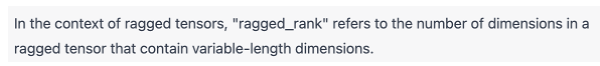

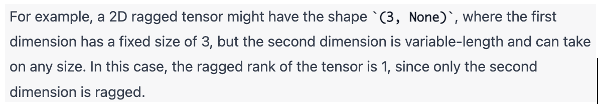

In [95]:
x.shape

TensorShape([2, None, None, 1])

In [96]:
y.shape

TensorShape([3])

In [97]:
print(x + y)    # This operation works cz here y is just a single element & a scalar can
                # always be broadcasted/stretched

<tf.RaggedTensor [[[[11, 21, 31],
   [12, 22, 32]], [], [[13, 23, 33]], [[14, 24, 34]]],
 [[[15, 25, 35],
   [16, 26, 36]], [[17, 27, 37]]]]>


Here are some examples of shapes that do not broadcast:

In [98]:
x.shape

TensorShape([2, None, None, 1])

In [99]:
y.shape

TensorShape([3])

In [100]:
# x      (2d ragged): 3 x (r1)
# y      (2d tensor): 3 x    4  # trailing dimensions do not match
x = tf.ragged.constant([[1, 2], [3, 4, 5, 6], [7]])   # (3, None)
y = tf.constant([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])  # (3,4)
try:
  x + y
except tf.errors.InvalidArgumentError as exception:
  print(exception)

Condition x == y did not hold.
Indices of first 3 different values:
[[1]
 [2]
 [3]]
Corresponding x values:
[ 4  8 12]
Corresponding y values:
[2 6 7]
First 3 elements of x:
[0 4 8]
First 3 elements of y:
[0 2 6]


In [101]:
# x      (2d ragged): 3 x (r1)
# y      (2d ragged): 3 x (r2)  # ragged dimensions do not match.
x = tf.ragged.constant([[1, 2, 3], [4], [5, 6]])     # 3,None
y = tf.ragged.constant([[10, 20], [30, 40], [50]])   # 3,None
try:
  x + y
except tf.errors.InvalidArgumentError as exception:
  print(exception)

Condition x == y did not hold.
Indices of first 2 different values:
[[1]
 [3]]
Corresponding x values:
[3 6]
Corresponding y values:
[2 5]
First 3 elements of x:
[0 3 4]
First 3 elements of y:
[0 2 4]


In [104]:
# x      (3d ragged): 3 x (r1) x 2
# y      (3d ragged): 3 x (r1) x 3  # trailing dimensions do not match
x = tf.ragged.constant([[[1, 2], [3, 4], [5, 6]],
                        [[7, 8], [9, 10]]])
y = tf.ragged.constant([[[1, 2, 0], [3, 4, 0], [5, 6, 0]],
                        [[7, 8, 0], [9, 10, 0]]])
try:
  x + y
except tf.errors.InvalidArgumentError as exception:
  print(exception)

Condition x == y did not hold.
Indices of first 3 different values:
[[1]
 [2]
 [3]]
Corresponding x values:
[2 4 6]
Corresponding y values:
[3 6 9]
First 3 elements of x:
[0 2 4]
First 3 elements of y:
[0 3 6]


**<font color=red>Shapes**

In [105]:
x.shape  # ???

TensorShape([2, None, None])

In [106]:
y.shape   # ???

TensorShape([2, None, None])

## RaggedTensor encoding

Ragged tensors are encoded using the `RaggedTensor` class. Internally, each `RaggedTensor` consists of:

- A `values` tensor, which concatenates the variable-length rows into a flattened list.
- A `row_partition`, which indicates how those flattened values are divided into rows.

![RaggedTensor encoding](https://www.tensorflow.org/images/ragged_tensors/ragged_encoding_2.png)

The `row_partition` can be stored using four different encodings:

- `row_splits` is an integer vector specifying the split points between rows.
- `value_rowids` is an integer vector specifying the row index for each value.
- `row_lengths` is an integer vector specifying the length of each row.
- `uniform_row_length` is an integer scalar specifying a single length for all rows.

![row_partition encodings](https://www.tensorflow.org/images/ragged_tensors/partition_encodings.png)

An integer scalar `nrows` can also be included in the `row_partition` encoding to account for empty trailing rows with `value_rowids` or empty rows with `uniform_row_length`.


In [107]:
rt = tf.RaggedTensor.from_row_splits(
    values=[3, 1, 4, 1, 5, 9, 2],
    row_splits=[0, 4, 4, 6, 7])
print(rt)

<tf.RaggedTensor [[3, 1, 4, 1], [], [5, 9], [2]]>


The choice of which encoding to use for row partitions is managed internally by ragged tensors to improve efficiency in some contexts. In particular, some of the advantages and disadvantages of the different row-partitioning schemes are:

- **Efficient indexing**: The `row_splits` encoding enables constant-time indexing and slicing into ragged tensors.
- **Efficient concatenation**: The `row_lengths` encoding is more efficient when concatenating ragged tensors, since row lengths do not change when two tensors are concatenated together.
- **Small encoding size**: The `value_rowids` encoding is more efficient when storing ragged tensors that have a large number of empty rows, since the size of the tensor depends only on the total number of values. On the other hand, the `row_splits` and `row_lengths` encodings are more efficient when storing ragged tensors with longer rows, since they require only one scalar value for each row.
- **Compatibility**: The `value_rowids` scheme matches the [segmentation](https://www.tensorflow.org/api_docs/python/tf/math#about_segmentation) format used by operations, such as `tf.segment_sum`. The `row_limits` scheme matches the format used by ops such as `tf.sequence_mask`.
- **Uniform dimensions**: As discussed below, the `uniform_row_length` encoding is used to encode ragged tensors with uniform dimensions.

### Multiple ragged dimensions

A ragged tensor with multiple ragged dimensions is encoded by using a nested `RaggedTensor` for the `values` tensor. Each nested `RaggedTensor` adds a single ragged dimension.

![Encoding of a ragged tensor with multiple ragged dimensions (rank 2)](https://www.tensorflow.org/images/ragged_tensors/ragged_rank_2.png)


**1st way**

In [108]:
rt = tf.RaggedTensor.from_row_splits(
    
    values=tf.RaggedTensor.from_row_splits(
        
        values=[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        row_splits=[0, 3, 3, 5, 9, 10]
    ),
    
    row_splits=[0, 1, 1, 5])

print(rt)
print("Shape: {}".format(rt.shape))
print("Number of partitioned dimensions: {}".format(rt.ragged_rank))

<tf.RaggedTensor [[[10, 11, 12]], [], [[], [13, 14], [15, 16, 17, 18], [19]]]>
Shape: (3, None, None)
Number of partitioned dimensions: 2


**2nd way**

In [109]:
values=tf.RaggedTensor.from_row_splits(
        
        values=[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        row_splits=[0, 3, 3, 5, 9, 10]
    )
values

final_values = tf.RaggedTensor.from_row_splits(values,row_splits=[0, 1, 1, 5])
print(values)
print('\n',final_values)

<tf.RaggedTensor [[10, 11, 12], [], [13, 14], [15, 16, 17, 18], [19]]>

 <tf.RaggedTensor [[[10, 11, 12]], [], [[], [13, 14], [15, 16, 17, 18], [19]]]>


The factory function `tf.RaggedTensor.from_nested_row_splits` may be used to construct a RaggedTensor with multiple ragged dimensions directly by providing a list of `row_splits` tensors:

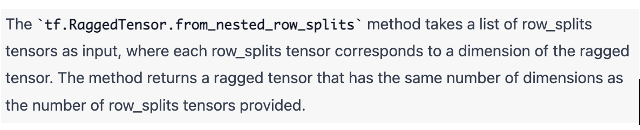

**3rd way, directly using nested_row_splits**

In [110]:
rt = tf.RaggedTensor.from_nested_row_splits(
    flat_values=[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
    nested_row_splits=([0, 1, 1, 5], [0, 3, 3, 5, 9, 10]))
print(rt)

<tf.RaggedTensor [[[10, 11, 12]], [], [[], [13, 14], [15, 16, 17, 18], [19]]]>


In [111]:
rt.shape

TensorShape([3, None, None])

### Ragged rank and flat values

A ragged tensor's ***ragged rank*** is the number of times that the underlying `values` tensor has been partitioned (i.e. the nesting depth of  `RaggedTensor` objects). The innermost `values` tensor is known as its ***flat_values***.  In the following example, `conversations` has ragged_rank=3, and its `flat_values` is a 1D `Tensor` with 24 strings:


In [112]:
# shape = [batch, (paragraph), (sentence), (word)]
conversations = tf.ragged.constant(
    [[[["I", "like", "ragged", "tensors."]],
      [["Oh", "yeah?"], ["What", "can", "you", "use", "them", "for?"]],
      [["Processing", "variable", "length", "data!"]]],
     [[["I", "like", "cheese."], ["Do", "you?"]],
      [["Yes."], ["I", "do."]]]])
conversations.shape

TensorShape([2, None, None, None])

In [113]:
assert conversations.ragged_rank == len(conversations.nested_row_splits)
conversations.ragged_rank  # Number of partitioned dimensions.

3

In [114]:
print(conversations.flat_values.numpy())

[b'I' b'like' b'ragged' b'tensors.' b'Oh' b'yeah?' b'What' b'can' b'you'
 b'use' b'them' b'for?' b'Processing' b'variable' b'length' b'data!' b'I'
 b'like' b'cheese.' b'Do' b'you?' b'Yes.' b'I' b'do.']


### Uniform inner dimensions

Ragged tensors with uniform inner dimensions are encoded by using a
multidimensional `tf.Tensor` for the flat_values (i.e., the innermost `values`).

![Encoding of ragged tensors with uniform inner dimensions](https://www.tensorflow.org/images/ragged_tensors/uniform_inner.png)

In [115]:
rt = tf.RaggedTensor.from_row_splits(
    values=[[1, 3], [0, 0], [1, 3], [5, 3], [3, 3], [1, 2]],
    row_splits=[0, 3, 4, 6])
print(rt)


<tf.RaggedTensor [[[1, 3],
  [0, 0],
  [1, 3]], [[5, 3]], [[3, 3],
                      [1, 2]]]>


In [116]:
print("Shape: {}".format(rt.shape))


Shape: (3, None, 2)


In [117]:
print("Number of partitioned dimensions: {}".format(rt.ragged_rank))


Number of partitioned dimensions: 1


In [118]:
print("Flat values shape: {}".format(rt.flat_values.shape))


Flat values shape: (6, 2)


In [119]:
print("Flat values:\n{}".format(rt.flat_values)) # 3D changed to 2D

Flat values:
[[1 3]
 [0 0]
 [1 3]
 [5 3]
 [3 3]
 [1 2]]


### Uniform non-inner dimensions

Ragged tensors with uniform non-inner dimensions are encoded by partitioning rows with `uniform_row_length`.

![Encoding of ragged tensors with uniform non-inner dimensions](https://www.tensorflow.org/images/ragged_tensors/uniform_outer.png)

In [120]:
rt = tf.RaggedTensor.from_uniform_row_length(
    values=tf.RaggedTensor.from_row_splits(
        values=[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        row_splits=[0, 3, 5, 9, 10]),
    uniform_row_length=2)
print(rt)


<tf.RaggedTensor [[[10, 11, 12], [13, 14]],
 [[15, 16, 17, 18], [19]]]>


In [121]:
print("Shape: {}".format(rt.shape))


Shape: (2, 2, None)


**<font color=red>ragged_rank**

In [122]:
print("Number of partitioned dimensions: {}".format(rt.ragged_rank))

Number of partitioned dimensions: 2
